In [3]:
import torch
from torch import nn, optim
from torch.functional import F
from torch.utils.data import DataLoader, random_split
from torchvision import transforms, datasets
import torchvision.models as models

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm  
from sklearn.decomposition import PCA
import umap
import math
import io
import umap.plot
import plotly.graph_objs as go 
import plotly.io as pio 
pio.renderers.default ='iframe'


from collections import defaultdict
from tqdm import tqdm
import wandb
import random
from PIL import Image  # Add this import statement

%matplotlib inline
import math,os,sys
import warnings 
warnings.filterwarnings('ignore')

In [4]:
from fastai.vision.all import*

In [5]:
from simple_cnn_dataset import TransformedDataset  
#load dataset 
data = pd.read_csv('../data/train.csv')
#data_shorted = data[:10000]
data_clp = data[:10000].reset_index(drop=True) # the index has to be readjusted otherwise it follows the whole data index... problematic
#temporarly trying to overfit with less data


#common transformation
default_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.Normalize(0.5,0.5)
])


In [13]:
transformed_data = TransformedDataset(data_clp, default_transform)

# Split the dataset into training and validation sets
train_size = int(0.8 * len(transformed_data))
val_size = len(transformed_data) - train_size
train_dataset, val_dataset = random_split(transformed_data, [train_size, val_size])

# Create DataLoaders for training and validation sets
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)


In [14]:
#dls = ImageDataLoaders('.',data_clp, valid_pct=0.2)

# visualizing Datapoints

In [41]:
def show_images(images, title =''):
    num_images = len(images)
    fig,axes = plt.subplots(1, num_images,figsize=(9,3))
    for i in range(num_images):
        img = np.squeeze(images[i])
        axes[i].imshow(img,cmap='gray')
        axes[i].axis('off')
    fig.suptitle(title)
    plt.show()



# lets build Neural Network
-  Define a neural network architecture with two convolution layers and two fully connected layers
- Input to the network is an MNIST image and Output is a 64 dimensional representation. 


In [9]:
from Network import Network,Network_t ,ContrastiveLoss_with_margin, CustomVGG
from utils import init_weights, init_weights_for_gelu,initialize_weights_mod,plot_activation_stats

In [12]:
model= CustomVGG()
learner = vision_learner(dls=train_loader, model,metrics=error_rate)

SyntaxError: positional argument follows keyword argument (2423303718.py, line 2)

In [43]:
net = CustomVGG()

# Load the VGG16 model unmodiefied first layer(to work for grey -> channel from 3 ->1) and last layers(change number of classes for the last classifier)
#net = models.vgg16(pretrained=False)


device= "cpu"
if torch.cuda.is_available():
    device = "cuda"
elif hasattr(torch.backends, "mps") and torch.backends.mps.is_available():
    device= "mps"

#device= "cpu" #overide device for overfitting a very small data batch
#net = net.to(device)

device

'mps'

In [44]:
# Load the VGG16 model without pretrained weights
vgg16 = models.vgg16(pretrained=False)

# Modify the first convolutional layer to accept grayscale images
vgg16.features[0] = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1)

# Optionally, initialize the weights of the modified layer
nn.init.kaiming_normal_(vgg16.features[0].weight, mode='fan_out', nonlinearity='relu')

# Modify the last fully connected layer to have the desired number of output features
# For example, if you have 10 classes:
num_classes = 10
vgg16.classifier[6] = nn.Linear(4096, num_classes)

# Optionally, initialize the weights of the modified layer
nn.init.kaiming_normal_(vgg16.classifier[6].weight, mode='fan_out', nonlinearity='relu')

#net = vgg16
# Print the modified model architecture to verify the changes
#print(net)

Parameter containing:
tensor([[-0.1410, -0.3981, -0.2691,  ...,  0.1951, -0.7479, -0.5271],
        [ 0.2064, -0.2596, -0.3511,  ..., -0.8443, -0.6866, -0.3299],
        [ 0.0882,  0.0318, -0.0855,  ..., -0.3006, -0.5139,  0.2493],
        ...,
        [-0.3118,  0.4580, -0.2575,  ..., -1.0160,  0.0337,  0.2387],
        [ 0.8992, -0.7287, -1.2752,  ...,  0.5314, -0.3085,  0.5228],
        [-0.3211,  0.2897,  0.0866,  ...,  0.6120,  0.1372,  1.0170]],
       requires_grad=True)

### optimzer initialization 

In [45]:
from torch.optim.lr_scheduler import ReduceLROnPlateau,CosineAnnealingLR

In [53]:
epoch_count=10
optimizer = torch.optim.AdamW(net.parameters(), lr =1e-3,weight_decay=1e-5)
#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.3)
scheduler = CosineAnnealingLR(optimizer, T_max=epoch_count, eta_min=1e-6)

#scheduler reduces plateau loss
#scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)


In [47]:
import os
checkpoint_dir ='checkpoints/'

if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

## Testing the state of the model defination of it works for simple digit recognition

In [ ]:
dls =

## experimaental model with simple image classification to check model health

learning rate 1e-06
Train Epoch: 0 [0/8000 (0%)]	Loss: 0.202057
learning rate 0.0002069012664799155
Train Epoch: 1 [0/8000 (0%)]	Loss: 0.506816
learning rate 0.0006548539886903893
Train Epoch: 2 [0/8000 (0%)]	Loss: 0.440275
learning rate 0.000975552729889455
Train Epoch: 3 [0/8000 (0%)]	Loss: 0.211208
learning rate 0.0009046039886905218
Train Epoch: 4 [0/8000 (0%)]	Loss: 0.227685
learning rate 0.0005005000000000014
Train Epoch: 5 [0/8000 (0%)]	Loss: 0.277208
learning rate 9.639601130970903e-05
Train Epoch: 6 [0/8000 (0%)]	Loss: 0.317336
learning rate 2.5447270110570814e-05
Train Epoch: 7 [0/8000 (0%)]	Loss: 0.381360
learning rate 0.00034614601130978615
Train Epoch: 8 [0/8000 (0%)]	Loss: 0.277862
learning rate 0.0007940987335200289
Train Epoch: 9 [0/8000 (0%)]	Loss: 0.300069
Plotting data for layer: features.1
Means: [[0.517668604850769, 0.5165414810180664, 0.5179567933082581, 0.5179733633995056, 0.5175551176071167, 0.5175710320472717, 0.5173277258872986, 0.5169453024864197, 0.516854524

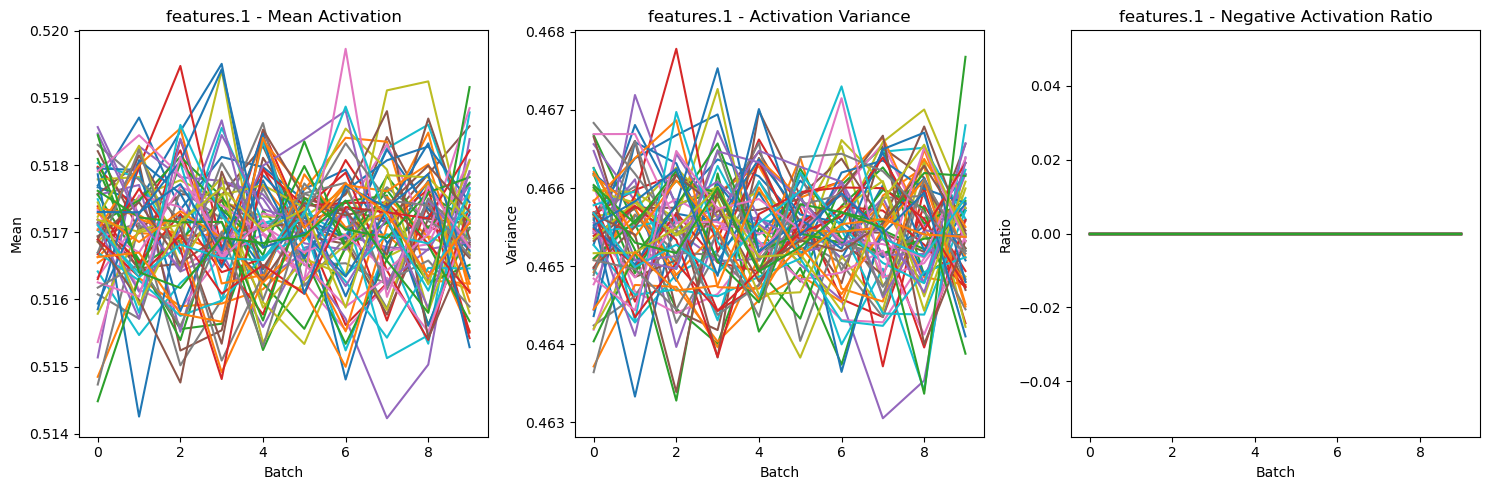

Plotting data for layer: features.5
Means: [[0.35927215218544006, 0.3612510561943054, 0.36027607321739197, 0.3603783845901489, 0.36155304312705994, 0.3607475757598877, 0.360782265663147, 0.3615177869796753, 0.3620483875274658, 0.362028568983078, 0.3601759970188141, 0.36570054292678833, 0.3602343201637268, 0.36082813143730164, 0.3589341938495636, 0.36024799942970276, 0.36329224705696106, 0.363482803106308, 0.3598649501800537, 0.35993582010269165, 0.3594624996185303, 0.3619241416454315, 0.3597092926502228, 0.3631444573402405, 0.3649705946445465, 0.3619439899921417, 0.3640799820423126, 0.36519768834114075, 0.3632640838623047, 0.3612022399902344, 0.36053961515426636, 0.3607052266597748, 0.36190417408943176, 0.36102280020713806, 0.36106833815574646, 0.36237257719039917, 0.36169978976249695, 0.3596790134906769, 0.3615454137325287, 0.3628808557987213, 0.3633507192134857, 0.3617267906665802, 0.3649539351463318, 0.3624303340911865, 0.3611780107021332, 0.36155256628990173, 0.36011916399002075, 0

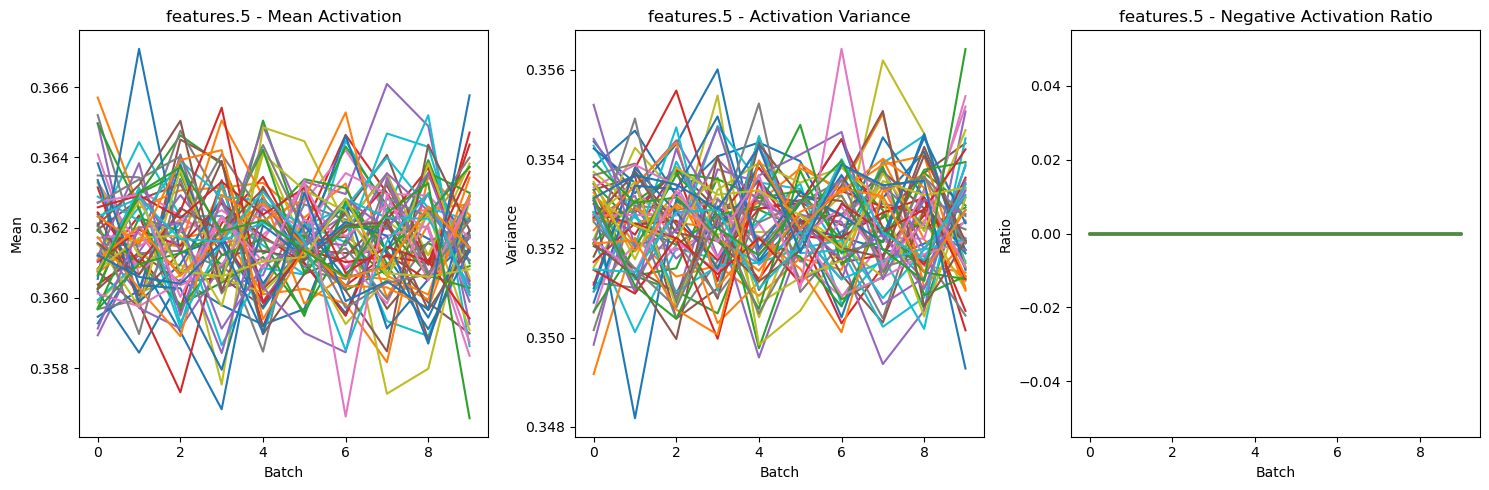

Plotting data for layer: features.9
Means: [[0.3731077015399933, 0.37479501962661743, 0.374075323343277, 0.3735659122467041, 0.3742862045764923, 0.3735833466053009, 0.37464967370033264, 0.3747732937335968, 0.3748400807380676, 0.3747488558292389, 0.37372109293937683, 0.3773154020309448, 0.3745623528957367, 0.37409907579421997, 0.3727114200592041, 0.3733454942703247, 0.3756215274333954, 0.37554875016212463, 0.37337586283683777, 0.3731025159358978, 0.3729575574398041, 0.37490779161453247, 0.37333694100379944, 0.3761679232120514, 0.37674298882484436, 0.37499547004699707, 0.37623611092567444, 0.37710240483283997, 0.37576940655708313, 0.3747076690196991, 0.37361326813697815, 0.3743652403354645, 0.3743723928928375, 0.3740304708480835, 0.37404829263687134, 0.3742969334125519, 0.3748198449611664, 0.3732028007507324, 0.3743702173233032, 0.37559038400650024, 0.37571045756340027, 0.3743899464607239, 0.37768977880477905, 0.37491849064826965, 0.3742416501045227, 0.37447383999824524, 0.37371894717216

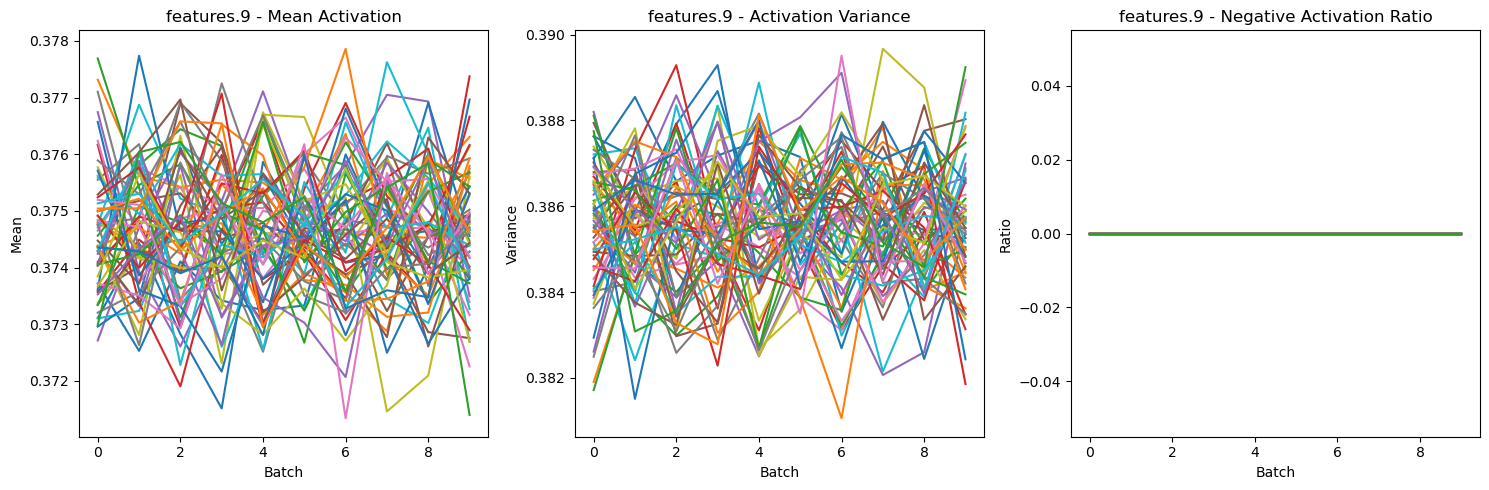

Plotting data for layer: features.12
Means: [[0.3746865391731262, 0.37685292959213257, 0.3757539689540863, 0.37501654028892517, 0.375309020280838, 0.37507006525993347, 0.3763086795806885, 0.3760899305343628, 0.3760892152786255, 0.37620994448661804, 0.37513458728790283, 0.37830623984336853, 0.3764741122722626, 0.3755027651786804, 0.37456414103507996, 0.3747841417789459, 0.3766270875930786, 0.3771043121814728, 0.37469741702079773, 0.37476080656051636, 0.3748065233230591, 0.3762969970703125, 0.37461164593696594, 0.3774460256099701, 0.37818029522895813, 0.37651628255844116, 0.37721773982048035, 0.3779345750808716, 0.37732672691345215, 0.3763895630836487, 0.37486788630485535, 0.37592750787734985, 0.3758607804775238, 0.3754676282405853, 0.37557703256607056, 0.3755224645137787, 0.3762461543083191, 0.3747791349887848, 0.37574338912963867, 0.37702295184135437, 0.3770250976085663, 0.3757156729698181, 0.3791339695453644, 0.37635740637779236, 0.3756401538848877, 0.3760073781013489, 0.3752632141113

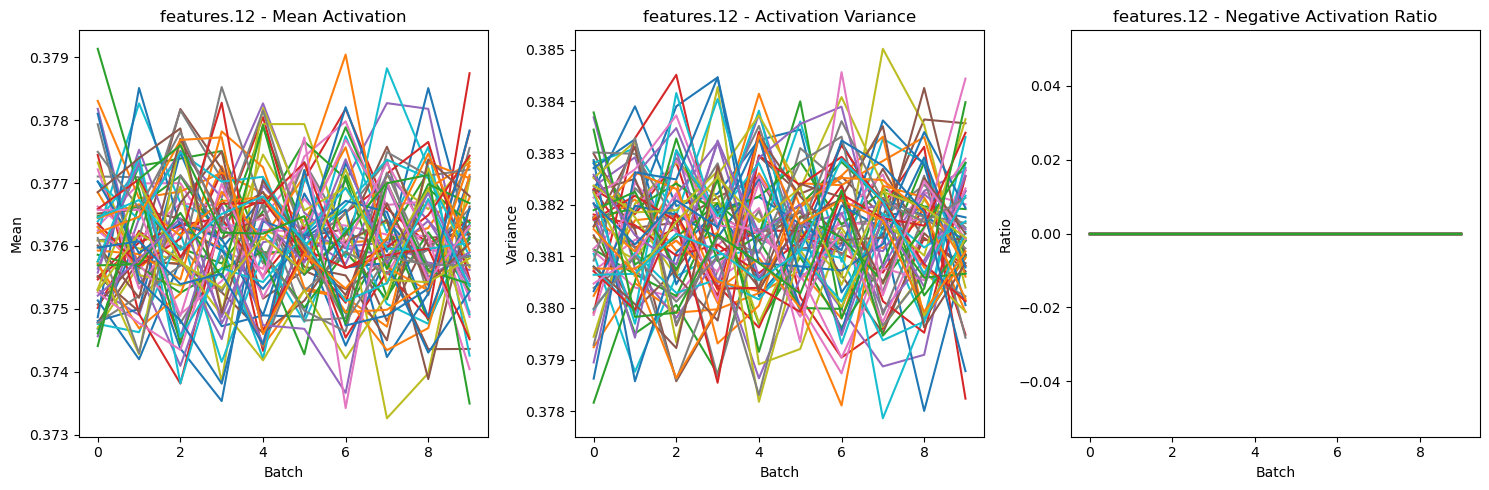

Plotting data for layer: classifier.1
Means: [[0.6213144063949585, 0.6272923946380615, 0.627491295337677, 0.6288794875144958, 0.630796492099762, 0.6293492317199707, 0.6332675218582153, 0.6285861134529114, 0.6283718347549438, 0.6270241737365723, 0.6308606863021851, 0.6311125755310059, 0.6266268491744995, 0.6264981031417847, 0.6259708404541016, 0.6275964975357056, 0.6255506873130798, 0.628041684627533, 0.628074049949646, 0.6258355379104614, 0.629981517791748, 0.6270120143890381, 0.6291515231132507, 0.6278490424156189, 0.6294093132019043, 0.6263649463653564, 0.6268115043640137, 0.6317952275276184, 0.632063627243042, 0.6331232786178589, 0.6277911067008972, 0.6316944360733032, 0.6249313354492188, 0.6327905654907227, 0.629142701625824, 0.6301106214523315, 0.6325129866600037, 0.6249288320541382, 0.6326260566711426, 0.6286398768424988, 0.6286439895629883, 0.6271244287490845, 0.6344361305236816, 0.6281209588050842, 0.6288661956787109, 0.6311619281768799, 0.626120388507843, 0.6264739036560059, 0

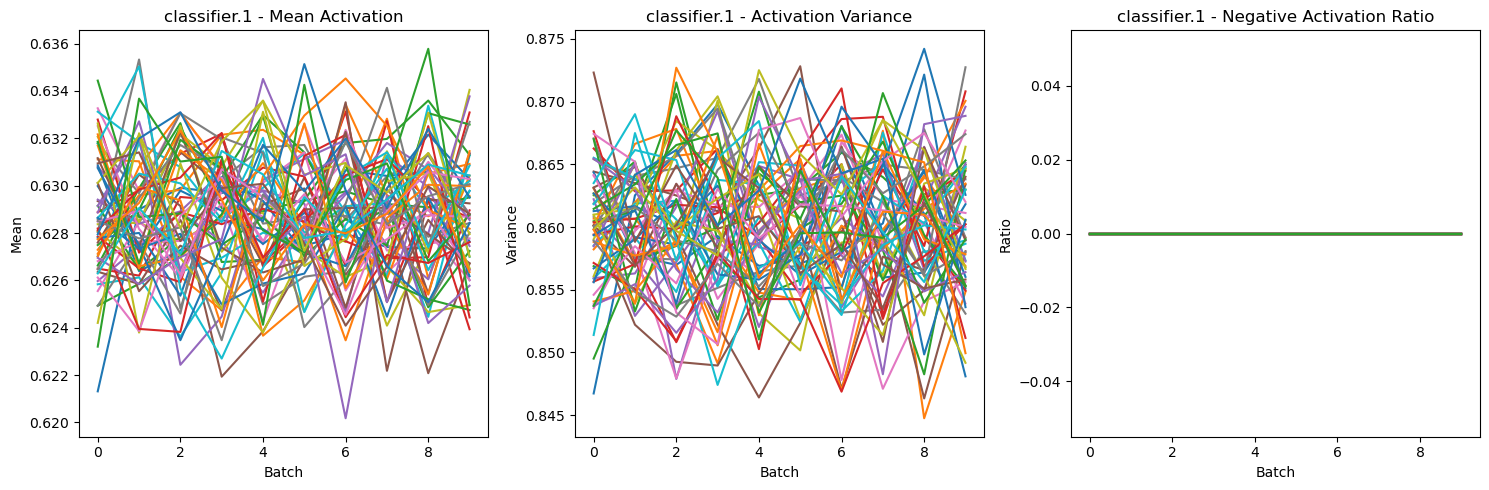

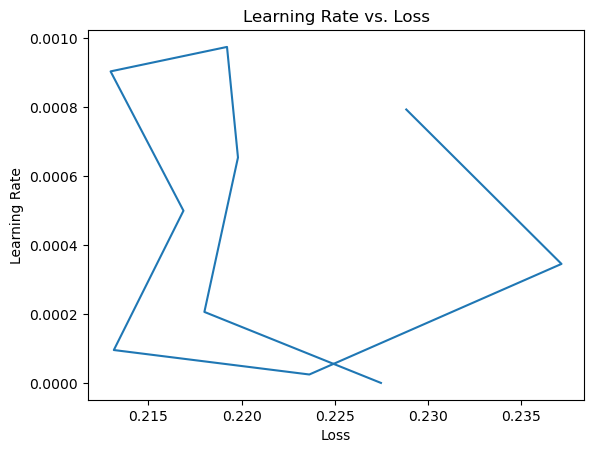

Plotting data for layer: features.1
Means: [[0.517668604850769, 0.5165414810180664, 0.5179567933082581, 0.5179733633995056, 0.5175551176071167, 0.5175710320472717, 0.5173277258872986, 0.5169453024864197, 0.5168545246124268, 0.5164161324501038, 0.5176935195922852, 0.514846920967102, 0.5175577998161316, 0.5173851251602173, 0.5185648798942566, 0.5182062983512878, 0.5163283944129944, 0.5160748958587646, 0.5177859663963318, 0.5180290341377258, 0.5179479122161865, 0.5166303515434265, 0.5180907845497131, 0.5163013935089111, 0.5151357054710388, 0.5171428322792053, 0.5153642892837524, 0.514732301235199, 0.5157852172851562, 0.5170271396636963, 0.5178621411323547, 0.5173594951629639, 0.5171207189559937, 0.5171886682510376, 0.5171813368797302, 0.5168896913528442, 0.5170490145683289, 0.5183001160621643, 0.5172295570373535, 0.516696035861969, 0.5158520936965942, 0.5170328617095947, 0.5144832134246826, 0.5166729092597961, 0.5171207189559937, 0.5169305801391602, 0.517910361289978, 0.5166976451873779, 

<Figure size 640x480 with 0 Axes>

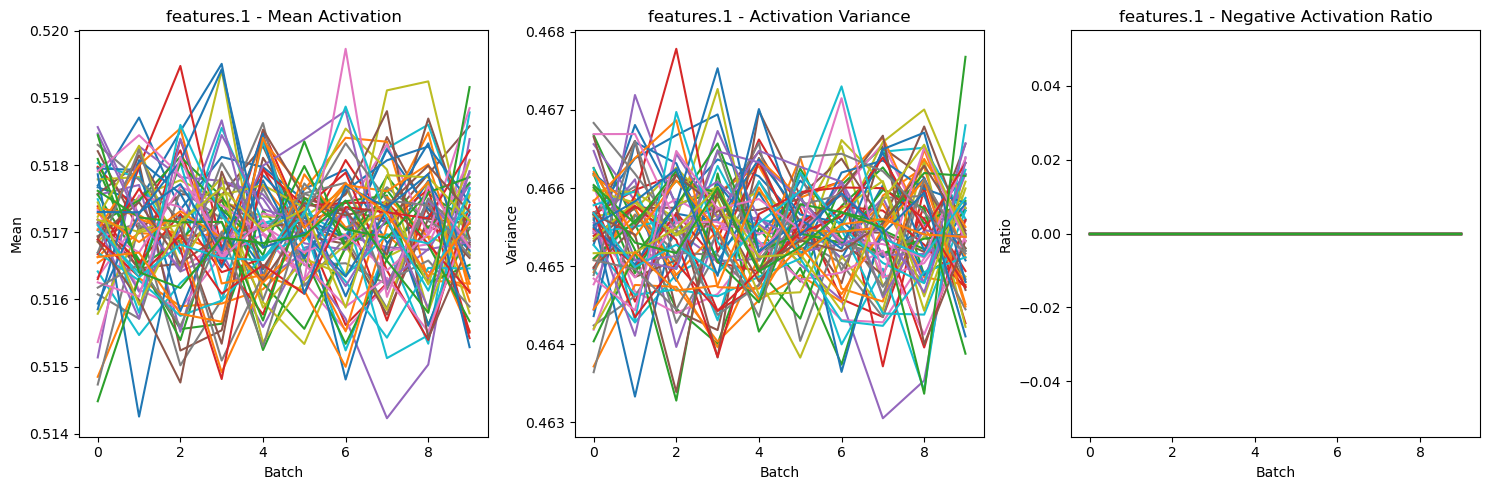

Plotting data for layer: features.5
Means: [[0.35927215218544006, 0.3612510561943054, 0.36027607321739197, 0.3603783845901489, 0.36155304312705994, 0.3607475757598877, 0.360782265663147, 0.3615177869796753, 0.3620483875274658, 0.362028568983078, 0.3601759970188141, 0.36570054292678833, 0.3602343201637268, 0.36082813143730164, 0.3589341938495636, 0.36024799942970276, 0.36329224705696106, 0.363482803106308, 0.3598649501800537, 0.35993582010269165, 0.3594624996185303, 0.3619241416454315, 0.3597092926502228, 0.3631444573402405, 0.3649705946445465, 0.3619439899921417, 0.3640799820423126, 0.36519768834114075, 0.3632640838623047, 0.3612022399902344, 0.36053961515426636, 0.3607052266597748, 0.36190417408943176, 0.36102280020713806, 0.36106833815574646, 0.36237257719039917, 0.36169978976249695, 0.3596790134906769, 0.3615454137325287, 0.3628808557987213, 0.3633507192134857, 0.3617267906665802, 0.3649539351463318, 0.3624303340911865, 0.3611780107021332, 0.36155256628990173, 0.36011916399002075, 0

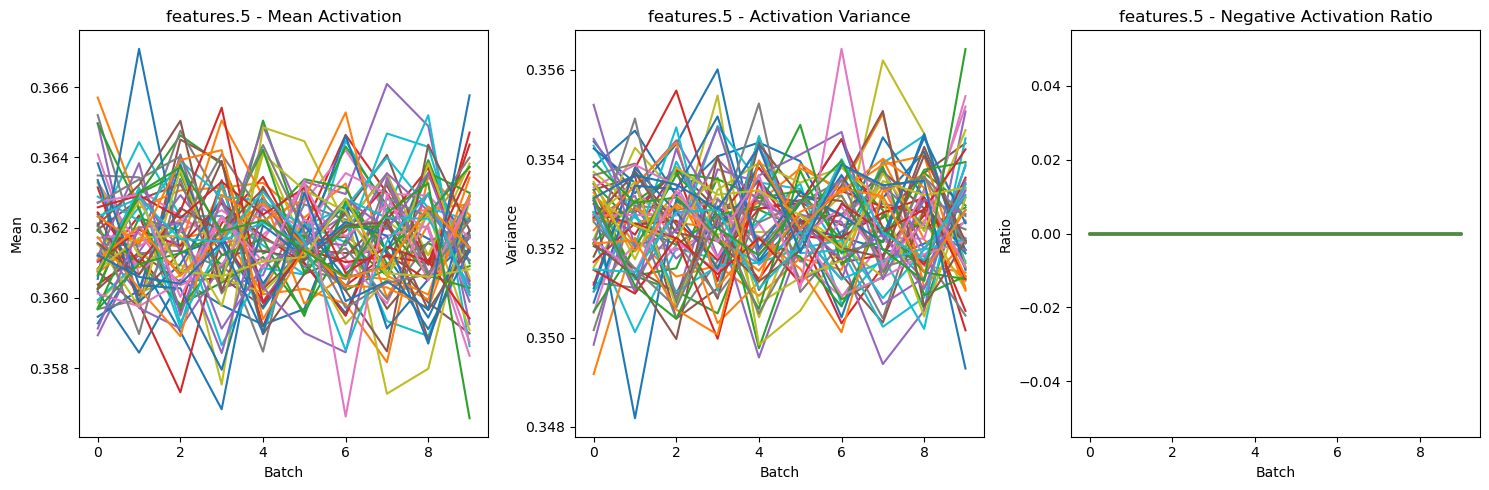

Plotting data for layer: features.9
Means: [[0.3731077015399933, 0.37479501962661743, 0.374075323343277, 0.3735659122467041, 0.3742862045764923, 0.3735833466053009, 0.37464967370033264, 0.3747732937335968, 0.3748400807380676, 0.3747488558292389, 0.37372109293937683, 0.3773154020309448, 0.3745623528957367, 0.37409907579421997, 0.3727114200592041, 0.3733454942703247, 0.3756215274333954, 0.37554875016212463, 0.37337586283683777, 0.3731025159358978, 0.3729575574398041, 0.37490779161453247, 0.37333694100379944, 0.3761679232120514, 0.37674298882484436, 0.37499547004699707, 0.37623611092567444, 0.37710240483283997, 0.37576940655708313, 0.3747076690196991, 0.37361326813697815, 0.3743652403354645, 0.3743723928928375, 0.3740304708480835, 0.37404829263687134, 0.3742969334125519, 0.3748198449611664, 0.3732028007507324, 0.3743702173233032, 0.37559038400650024, 0.37571045756340027, 0.3743899464607239, 0.37768977880477905, 0.37491849064826965, 0.3742416501045227, 0.37447383999824524, 0.37371894717216

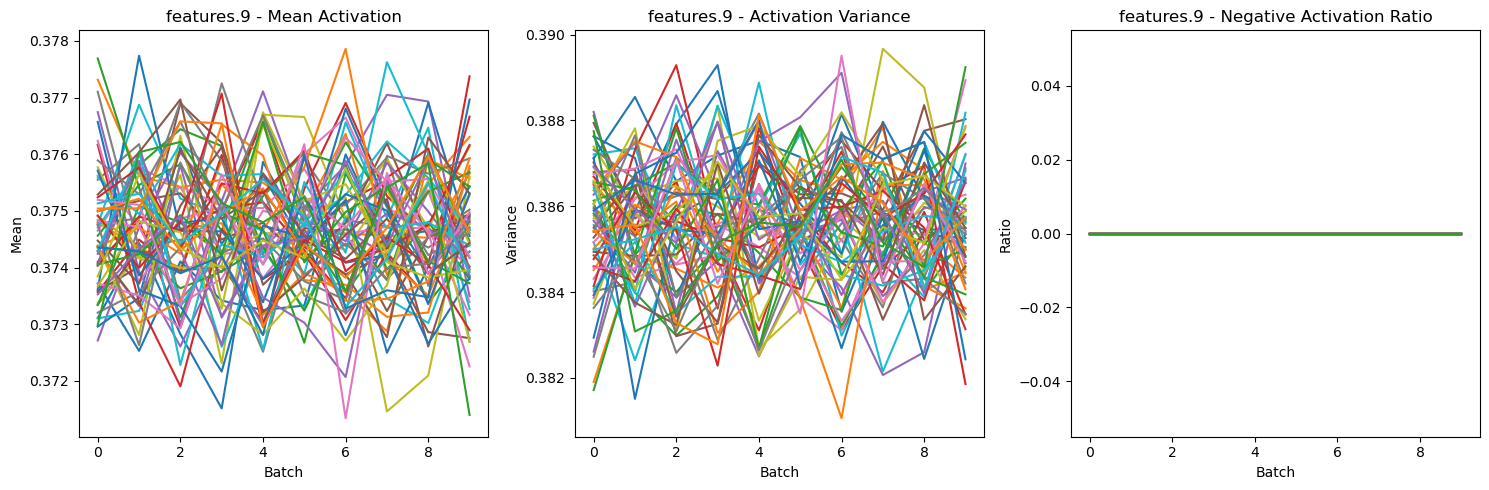

Plotting data for layer: features.12
Means: [[0.3746865391731262, 0.37685292959213257, 0.3757539689540863, 0.37501654028892517, 0.375309020280838, 0.37507006525993347, 0.3763086795806885, 0.3760899305343628, 0.3760892152786255, 0.37620994448661804, 0.37513458728790283, 0.37830623984336853, 0.3764741122722626, 0.3755027651786804, 0.37456414103507996, 0.3747841417789459, 0.3766270875930786, 0.3771043121814728, 0.37469741702079773, 0.37476080656051636, 0.3748065233230591, 0.3762969970703125, 0.37461164593696594, 0.3774460256099701, 0.37818029522895813, 0.37651628255844116, 0.37721773982048035, 0.3779345750808716, 0.37732672691345215, 0.3763895630836487, 0.37486788630485535, 0.37592750787734985, 0.3758607804775238, 0.3754676282405853, 0.37557703256607056, 0.3755224645137787, 0.3762461543083191, 0.3747791349887848, 0.37574338912963867, 0.37702295184135437, 0.3770250976085663, 0.3757156729698181, 0.3791339695453644, 0.37635740637779236, 0.3756401538848877, 0.3760073781013489, 0.3752632141113

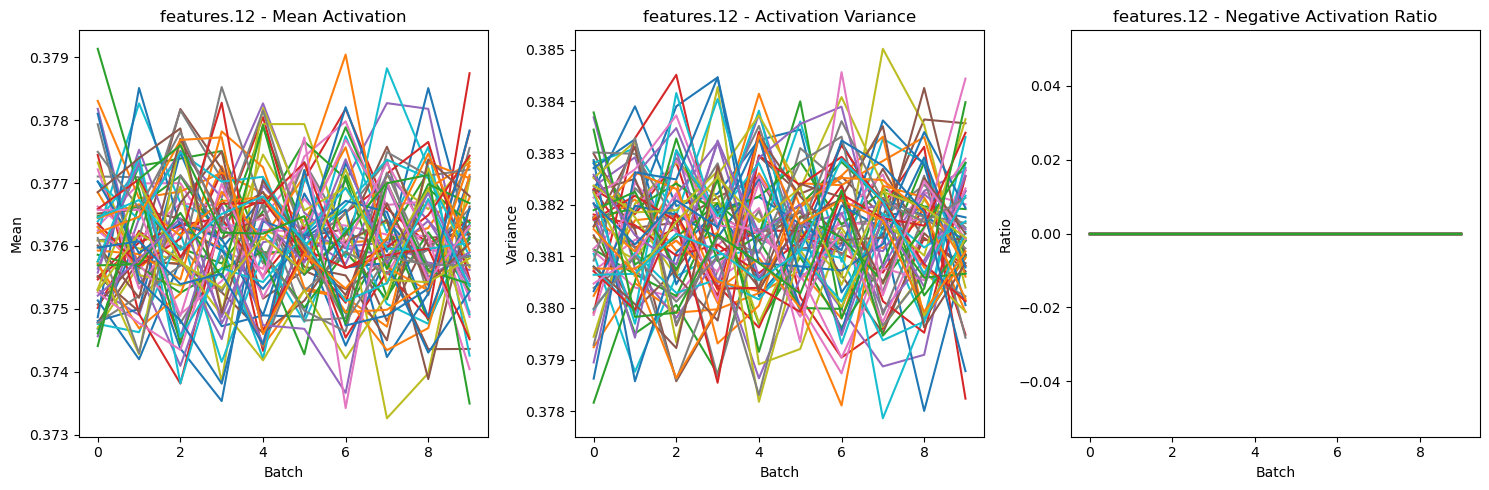

Plotting data for layer: classifier.1
Means: [[0.6213144063949585, 0.6272923946380615, 0.627491295337677, 0.6288794875144958, 0.630796492099762, 0.6293492317199707, 0.6332675218582153, 0.6285861134529114, 0.6283718347549438, 0.6270241737365723, 0.6308606863021851, 0.6311125755310059, 0.6266268491744995, 0.6264981031417847, 0.6259708404541016, 0.6275964975357056, 0.6255506873130798, 0.628041684627533, 0.628074049949646, 0.6258355379104614, 0.629981517791748, 0.6270120143890381, 0.6291515231132507, 0.6278490424156189, 0.6294093132019043, 0.6263649463653564, 0.6268115043640137, 0.6317952275276184, 0.632063627243042, 0.6331232786178589, 0.6277911067008972, 0.6316944360733032, 0.6249313354492188, 0.6327905654907227, 0.629142701625824, 0.6301106214523315, 0.6325129866600037, 0.6249288320541382, 0.6326260566711426, 0.6286398768424988, 0.6286439895629883, 0.6271244287490845, 0.6344361305236816, 0.6281209588050842, 0.6288661956787109, 0.6311619281768799, 0.626120388507843, 0.6264739036560059, 0

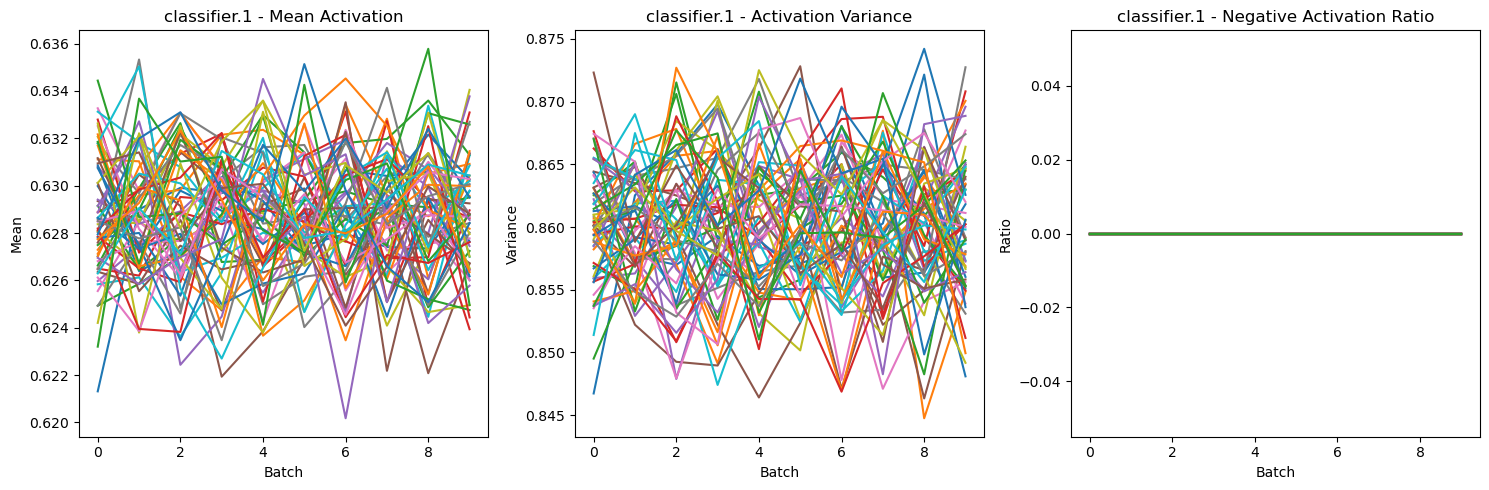

In [59]:
import wandb
import random

# start a new wandb run to track this script
wandb.init(
    # set the wandb project where this run will be logged
    project="Contrastive_learning",

    # track hyperparameters and run metadata
    config={
    "learning_rate": 0.01,
    "architecture": "vgg16 experimental model health",
    "dataset": "Mnist -dataset",
    "epochs": 10,
    "batch size" : 128,
    }
)

epochs =10
activations_list = []
gradients = []
ud =[]

def training_model(epoch=epochs):
    net = CustomVGG()
    #The log="all" parameter tells wandb to log gradients and parameters, and 
    #log_freq=64 means it will log every 64 batches.
    wandb.watch(net, log="all", log_freq=64) 
    #net.apply(init_weights_for_gelu)
    net = net.to(device)
    initialize_weights_mod(net, activation_function='relu')
    
    lrs = []
    losses = []
    activations_dict = defaultdict(lambda: {'mean': [], 'var': [], 'neg_ratio': []})
    
    def get_activation_stats(name):
        def hook(model, input, output):
            mean = output.detach().mean().item()
            var = output.detach().var().item()
            neg_ratio = (output.detach() < 0).float().mean().item()
            activations_dict[name]['mean'].append(mean)
            activations_dict[name]['var'].append(var)
            activations_dict[name]['neg_ratio'].append(neg_ratio)
            # this was not printing coz of leakyReLU wasnt correctly called(was only nn.ReLU)
            #print(f'Hook called for {name}: mean={mean}, var={var}, neg_ratio={neg_ratio}')
        return hook   
    
    # Register hooks for GELU/ReLU layers depends (or whatever activation you're using)
    for name, layer in net.named_modules():
        if isinstance(layer, nn.ReLU):
            layer.register_forward_hook(get_activation_stats(name))
            #print(f'Registered hook for layer: {name}') #-----debugging print worked
            
    def capture_gradient(name):
        def hook(module, grad_input, grad_output):
            gradients.append((name, grad_output[0].detach()))
        return hook
    
    #model.train()
    for epoch in range(epoch):
        epoch_loss = 0
        batches = 0

        for param_group in optimizer.param_groups:
            lrs.append(param_group['lr'])
        
        print('learning rate', lrs[-1])
        wandb.log({'learning rate': lrs[-1]})
        
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = net(data)
            loss = F.nll_loss(output, target)
            loss.backward()
            norm = torch.nn.utils.clip_grad_norm_(net.parameters(), 1.0)
            optimizer.step()
            scheduler.step()
    
            epoch_loss += loss.item()
            batches += 1

            if batch_idx % 100 == 0:
                print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')
    
            
                #Compute values  for wandb logging
                current_step = batch_idx * len(data)
                total_steps = len(train_loader.dataset)
                percentage_complete = 100. * batch_idx / len(train_loader)
                loss_value = loss.item()
        
                # Log the values with wandb
                wandb.log({
                    'epoch': epoch,
                    'current_step': current_step,
                    'total_steps': total_steps,
                    'percentage_complete': percentage_complete,
                    'loss': loss_value
                })
                
            # Average the epoch loss over batches
            #fixing the different length of lr and losses items (10 vs 630) by averaging loss per epoch
        activations_list.append({k: {stat: v[stat][-batches:] for stat in v} for k, v in activations_dict.items()})
        losses.append(epoch_loss / batches)
        current_lr = optimizer.param_groups[0]['lr']
        with torch.no_grad():
            #ud.append([(lr*p.grad.std()/ p.data.std().log10().item()) for p in net.parameters()])
            epsilon = 1e-8
            ud.append([(current_lr * p.grad.std() / (p.data.std() + epsilon).log10().item()) for p in net.parameters() if p.grad is not None])
    
       
        

    plot_activation_stats(activations_list)

    plt.figure()
    plt.plot(losses, lrs)
    plt.ylabel('Learning Rate')
    plt.xlabel('Loss')
    plt.title('Learning Rate vs. Loss')
    plt.show()

    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    
    # Convert BytesIO to PIL Image
    image1 = Image.open(buf)
    wandb.log({"Learning Rate vs. Loss": wandb.Image(image1)})

    return {
        "net": net,
        "losses": losses,
        "activations": activations_list
    }

def plot_activation_stats(activations_list):
    if not activations_list:
        print("No activation data to plot.")
        wandb.log({'message':'No activation data to plot'})
        return

    for layer_name in activations_list[0].keys():
        means = [epoch[layer_name]['mean'] for epoch in activations_list]
        vars = [epoch[layer_name]['var'] for epoch in activations_list]
        neg_ratios = [epoch[layer_name]['neg_ratio'] for epoch in activations_list]

        # logging this stat only on wandb 
        print(f'Plotting data for layer: {layer_name}')
        wandb.log({'Plotting data for layer':layer_name}) # logging this stat only on wandb 
        print(f'Means: {means}')
        wandb.log({'Means': means})
        print(f'Variances: {vars}')
        wandb.log({'Variances': vars})
        print(f'Negative Ratios: {neg_ratios}')
        wandb.log({'Negative Ratios':neg_ratios})

        plt.figure(figsize=(15, 5))
        plt.subplot(131)
        plt.plot(means)
        plt.title(f'{layer_name} - Mean Activation')
        plt.xlabel('Batch')
        plt.ylabel('Mean')
        
        plt.subplot(132)
        plt.plot(vars)
        plt.title(f'{layer_name} - Activation Variance')
        plt.xlabel('Batch')
        plt.ylabel('Variance')

        plt.subplot(133)
        plt.plot(neg_ratios)
        plt.title(f'{layer_name} - Negative Activation Ratio')
        plt.xlabel('Batch')
        plt.ylabel('Ratio')
         
        plt.tight_layout()
        

        # Save the plot to a buffer
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)

        # Convert BytesIO to PIL Image
        image = Image.open(buf)

        # Log the plot to Weights and Biases
        wandb.log({f'{layer_name} activations': wandb.Image(image)})
        plt.show() # this should be after wandb log 

        plt.close()  # Close the figure to free up memory
        buf.close()


training_result = training_model()
model = training_result["net"]

plot_activation_stats(activations_list)

wandb.finish()



Text(0.5, 1.0, 'update to data raio distribation, LR setting')

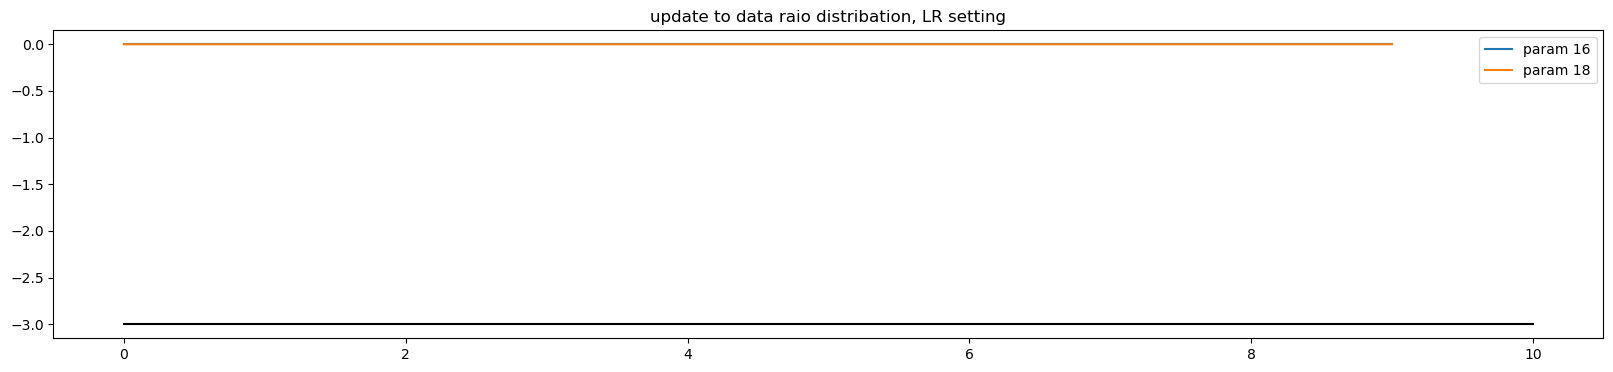

In [60]:
#visualize histogram of gradient
plt.figure(figsize=(20,4)) # width and height of the plot
legends = []
for i,p in enumerate(net.parameters()): 
    if p.ndim == 2:
        plt.plot([ud[j][i].cpu().numpy() for j in range(len(ud))])
        legends.append('param %d' % i)
plt.plot([0, len(ud)], [-3, -3], 'k') # those ratios should be ~1e-3, indicated on the plot with black         
plt.legend(legends);
plt.title('update to data raio distribation, LR setting')

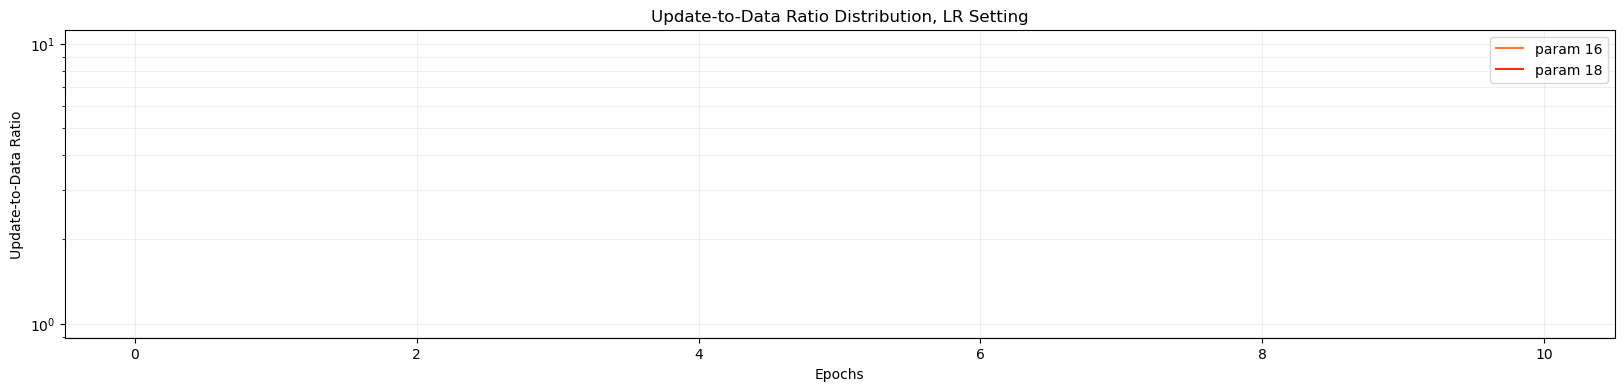

In [61]:
import matplotlib.cm as cm

plt.figure(figsize=(20,4))
legends = []
colors = cm.rainbow(np.linspace(0, 1, len(list(net.parameters()))))
for i, (p, color) in enumerate(zip(net.parameters(), colors)):
    if p.ndim == 2:
        plt.plot([ud[j][i].cpu().numpy() for j in range(len(ud))], color=color)
        legends.append(f'param {i}')
plt.plot([0, len(ud)], [-3, -3], 'k')
plt.legend(legends)
plt.title('Update-to-Data Ratio Distribution, LR Setting')
plt.xlabel('Epochs')
plt.ylabel('Update-to-Data Ratio')
plt.yscale('log')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.show()